<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/Kursach/%D0%9F%D1%83%D0%BD%D0%BA%D1%82_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

In [26]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
# <br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
# </br>
# <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
# <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: right;">Студент: Барбашин Андрей Алексеевич</h5>
# <h5 style="text-align: right;">Группа: ТФэ-01-20</h5>

# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: center;">Москва 2023</h5>





#  Вариант №1

#  $\space$ Дано:
# * Тип турбины: К-800-23,5 ЛМЗ
# * $P_0 = 25 \space МПа $ - Начальное давление
# * $t_0 = 560 ^\circ C$ -  Начальная температура
# * $P_{пп} = 3.62 \space МПа$ -  Давление промперегрева
# * $t_{пп} = 565 ^\circ C$ -  Температура промперегрева
# * $P_{к} = 3.5 \space кПа$ -  Давление в конденсаторе
# * $t_{п.в.} = 269^\circ C$ -  Температура питаталеьной воды

# * $N_{э} = 830 \space МВт$ -  Электрическая мощность
# * z = 9 -  Число отборов

# # 1. Построение процесса расширения пара в турбине.
# Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

Давление и Температрура в точке 1 -  3.982 МПа   570.238 C
Давление и Температрура в точке 2 -  0.003 МПа   299.823 C
Внутрениий КПД 46.002 %
Массовый расход в турбину на входе 646.008
Массовый расход в конденсатор: 432.268


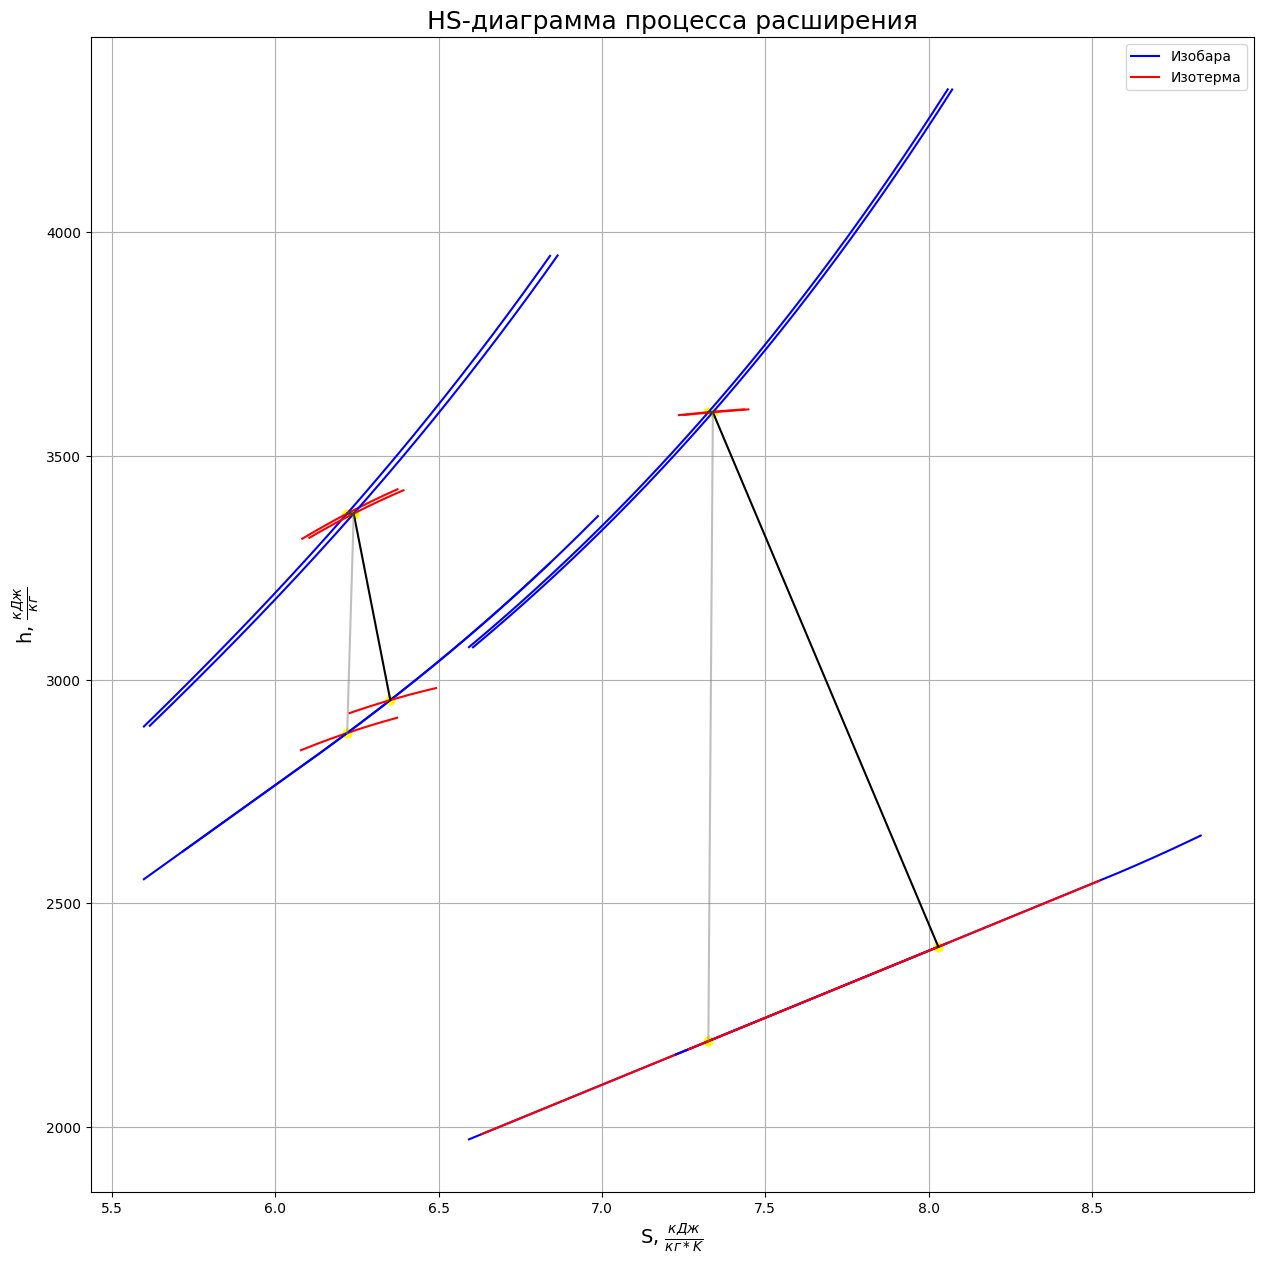

In [47]:
from typing import List, Tuple, Optional
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
from iapws import IAPWS97

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

#Исходные данные
#Тип турбины К-800-23,5 ЛМЗ

p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269 #Температура питательной воды
electrical_power = 830 * (10 ** 6) #Электричесская мощность
z = 9 #Число отборов шт.
avg_diameter = 0.9 / 1000# dр.с. = 0,9 - 1,1
rotation_speed = 50 #n
H_0 = 105
p_feed_water = 1.35 * p_0 #Давление питательной воды

#КПД
internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

#Потери давления
delta_p0 = 0.05 * p_0
delta_p_middle = 0.1 * p_middle
delta_p_1 = 0.03 * p_middle


real_p0 = p_0 - delta_p0
real_p1t = p_middle + delta_p_middle
real_p_middle = p_middle - delta_p_1

def get_points():
  _point_0 = gas(P = p_0 * unit, T=to_kelvin(t_0))
  point_0 = gas(P=real_p0 * unit, h=_point_0.h)
  point_1t = gas(P=real_p1t * unit, s=_point_0.s)

  hp_heat_drop = (_point_0.h - point_1t.h) * internal_efficiency
  h_1 = point_0.h - hp_heat_drop
  point_1 = gas(P=real_p1t * unit, h=h_1)

  _point_middle = gas(P=p_middle * unit, T=to_kelvin(t_middle))
  point_middle = gas(P=real_p_middle * unit, h=_point_middle.h)
  point_2t = gas(P=p_k * unit, s=_point_middle.s)

  lp_heat_drop = (_point_middle.h - point_2t.h) * internal_efficiency
  h_2 = point_middle.h - lp_heat_drop
  point_2 = gas(P=p_k * unit, h=h_2)
  point_k_water = gas(P=p_k * unit, x=0)
  point_feed_water = gas(P=p_feed_water * unit, T=to_kelvin(t_feed_water))
  return _point_0, point_0, point_1t, hp_heat_drop, point_1, _point_middle, point_middle, lp_heat_drop, point_2, point_2t, point_k_water, point_feed_water

_point_0, point_0, point_1t, hp_heat_drop, point_1, _point_middle, point_middle, lp_heat_drop, point_2, point_2t, point_k_water, point_feed_water = get_points()

def get_ksi(point_0, point_1t, _point_middle, point_middle, point_2, point_k_water, point_feed_water):
  numenator_without = point_2.T * (_point_middle.s - point_k_water.s)
  denumenator_without = (point_0.h - point_1t.h) + (point_middle.h - point_k_water.h)
  without_part = 1 - (numenator_without / denumenator_without)

  numenator_infinity = point_2.T * (_point_middle.s - point_feed_water.s)
  denumenator_infinity = (point_0.h - point_1t.h) + (point_middle.h - point_feed_water.h)
  infinity_part = 1 - (numenator_infinity / denumenator_infinity)

  ksi_infinity = 1 - (without_part / infinity_part)
  coeff = (point_feed_water.T - point_2.T) / (to_kelvin(374.2) - point_2.T)
  #print(coeff)
  ksi = 0.83 * ksi_infinity
  return ksi

ksi = get_ksi(point_0, point_1t, _point_middle, point_middle, point_2, point_k_water, point_feed_water)

#КПД
def get_eff(hp_heat_drop, lp_heat_drop, point_middle, point_k_water, point_feed_water, ksi, point_0, point_1):
  eff_num = hp_heat_drop + lp_heat_drop
  eff_denum = hp_heat_drop + (point_middle.h - point_k_water.h)

  efficiency = (eff_num / eff_denum) * (1 / (1 - ksi))

  estimated_heat_drop = efficiency * ((point_0.h - point_feed_water.h) + (point_middle.h - point_1.h))
  return efficiency, estimated_heat_drop

#Массовый расход в турбину на входе
def get_inlet_mass_flow(estimated_heat_drop):
  inlet_mass_flow = electrical_power / (estimated_heat_drop * 1000 * mechanical_efficiency * generator_efficiency)
  return inlet_mass_flow

#Массовый расход в конденсатор
def get_condenser_mass_flow(point_2, point_k_water, efficiency):
  condenser_mass_flow = (electrical_power /((point_2.h - point_k_water.h) * 1000 * mechanical_efficiency * generator_efficiency) * ((1 / efficiency) - 1))
  return condenser_mass_flow

efficiency, estimated_heat_drop = get_eff(hp_heat_drop, lp_heat_drop, point_middle, point_k_water, point_feed_water, ksi, point_0, point_1)
G_0 = get_inlet_mass_flow(estimated_heat_drop)
G_k = get_condenser_mass_flow(point_2, point_k_water, efficiency)

print("Давление и Температрура в точке 1 - ", round(point_1.P, 3), "МПа"," ", round(point_1.T,3), "C")
print("Давление и Температрура в точке 2 - ", round(point_2.P, 3), "МПа"," ", round(point_2.T,3), "C")
print("Внутрениий КПД", round(efficiency * 100, 3), "%")

print("Массовый расход в турбину на входе", round(G_0, 3))
print("Массовый расход в конденсатор:", round(G_k, 3))

#Построение процесса расширения в турбине 
def legend_without_duplicate_labels(ax: plt.Axes) -> None:
    """
    Убирает дубликаты из легенды графика
    :param plt.Axes ax: AxesSubplot с отрисованными графиками
    :return None:
    """
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

def get_isobar(point):
  s = point.s
  points_s = np.arange(s * 0.9, s * 1.1, 0.2 * s / 1000)     
  points_h = [gas(P=point.P, s=_s).h for _s in points_s]  
  return points_h, points_s

def get_isoterm_steam(point):
  p = point.P
  s = point.s
  p_00 = np.arange(p * 0.8, p * 1.2, 0.4 * p / 1000)
  points_ss = [] 
  points_hh = []
  for value in p_00:
    if (gas(P = value, T=point.T).s > s * 0.8 and gas(P = value, T=point.T).s < s * 1.2):
      points_ss.append(gas(P = value, T=point.T).s)
      points_hh.append(gas(P = value, T=point.T).h)
  return points_hh, points_ss

def get_isoterm_two_phases(point):
    """
    Собрать координаты изотермы для влажного пара в hs осях    
    """
    x = point.x
    p = point.P
    x_values = np.arange(x * 0.9, min(x * 1.1, 1), (1 - x) / 1000)
    h_values = np.array([gas(P=p, x=_x).h for _x in x_values])
    s_values = np.array([gas(P=p, x=_x).s for _x in x_values])
    return h_values, s_values

def get_isoterm(point):
    """
    Собрать координаты изотермы в hs осях
    """
    if point.phase == 'Two phases':
        return get_isoterm_two_phases(point)
    return get_isoterm_steam(point)

def plot_hs(points: list, ax):
  for point in points:
    isobar_h, isobar_s = get_isobar(point)    
    isoterm_h, isoterm_s = get_isoterm(point)  
    ax.plot(isobar_s, isobar_h, color="blue", label='Изобара')   
    ax.plot(isoterm_s, isoterm_h, color="red", label='Изотерма')
    ax.scatter(point.s, point.h,  s=40, color="yellow")
    ax.legend()
    legend_without_duplicate_labels(ax)
    
def plot_process(points, ax, **kwargs):
  ax.plot([point.s for point in  points], [point.h for point in points], **kwargs)

fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.set_xlabel(r"S, $\frac{кДж}{кг * K}$", fontsize=14)
ax.set_ylabel(r"h, $\frac{кДж}{кг}$", fontsize=14)
ax.set_title("HS-диаграмма процесса расширения", fontsize=18)
plt.grid()

plot_hs([_point_0, point_0, point_1t, point_1], ax = ax)
plot_hs([_point_middle, point_middle, point_2t, point_2], ax = ax)
plot_process([_point_0, point_0, point_1], ax = ax, color='black')
plot_process([_point_middle, point_middle, point_2], ax = ax, color='black')
plot_process([_point_0, point_0, point_1t], ax=ax, alpha=0.5, color='grey')
plot_process([_point_middle, point_middle, point_2t], ax=ax, alpha=0.5, color='grey')
plt.show()

# 2. Проведение расчета регулирующей ступени и определение зависимости ηол от 
# U/cф. Диапазон варьируемого параметра для дан в задании. Обоснованно 
# выбрать вариант исполнения регулирующей ступени для проектирования ЦВД
# в рамках заданного диапазона.

In [52]:
import math as m
import numpy as np

#окружная скорость на среднем диаметре u
u = m.pi * avg_diameter * rotation_speed
#степень реактивности
ro = 0.05 #степень реактивности принять в диапазоне 0,05-0,1
#Изоэнтропийный теплоперепад сопловой решетки по параметрам торможения
Hoc = (1 - ro) * H_0
#Изоэнтропийный теплоперепад в рабочей решетке по статическим параметрам
Hop = H_0 * ro
#Теоретическая энтальпия за сопловой решеткой
h1t = _point_0.h - Hoc
#Теоретическая скорость выхода из сопловых лопаток
c1t = m.sqrt(2 * H_0)
#Скорость звука за сопловой решеткой (теоретическая)
k = 1.380649 * (10 ** -23)
p1 = gas(h = h1t, s = _point_0.s)
v1t = gas(h = h1t, s = _point_0.s)
a1t = m.sqrt(k * p1.P * v1t.v)
#Число Маха по скорости c1t
M1t = c1t / a1t
#Выходная площадь сопловой решетки (предварительная) 
mu1 = 0.97
F1 = (G_0 * v1t.v) / (mu1 * c1t)
alfa1_e = 10 #Угол α1э направления скорости с1t, град Принимаем в диапазоне α1э=10-16
#Произведение el1
el1 = F1 / (m.pi * avg_diameter * m.sin(m.radians(alfa1_e)))
#Оптимальное значение степени парциальности eопт
e_opt = 4 * m.sqrt(el1) #так как получилось больше 0,85 принимаем e_opt = 0.85
print(e_opt)
e_opt = 0.85
#Высота сопловых лопаток 𝑙1
l1 = el1 / e_opt
#
b1 = 51.5 / 1000
#Уточняем коэффициент расхода сопловой решетки
mu1 = 0.982 - 0.005 * (b1 / l1)
#Количество лопаток в сопловой решетке z1
t1opt = 0.72
z1 = (m.pi * avg_diameter * e_opt) / (b1 * t1opt) #???
print(z1)
z1 = 65
#После округления z1 уточним относительный шаг
t1 = (m.pi * avg_diameter * e_opt) / (b1 *z1)
t1
#Угол установки лопатки в сопловой решетке αуст
#alfa_ust = 
#Коэффициент потерь в сопловой решетке ζс
#ksi_c = 
#Коэффициент скорости сопловой решетки φ
#fi = m.sqrt(1 - (ksi_c / 100))
#Проверяем коэффициент скорости сопловой решетки φ'
#fi_ = 0.98 - 0.008 * (b1 / l1)
#Находим расхождение между φ и φ'
#delta = (fi - fi_) / fi
#Скорость выхода пара из сопловой решетки с1

#Угол alfa1 вектора скорости с1

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#

#



157.90683052140147
0.06481441154250787


0.0007179442509323949